In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#importing/load dataset
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
#add another column for our target
df['Target Class'] = iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target Class       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
#Extract the dependant and independant variables
#We take all the rows and columns except the target class/ last column
#iloc[rows,columns]
X = df.iloc[:, :-1] #Independant Variables
y = df.iloc[:, -1] #Dependant Variables
print(X.shape,y.shape)

(150, 4) (150,)


In [6]:
#Splitting the dataset into training and test set (75/25)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
#Standardize the variable
scaler = StandardScaler()
#Fit the scaler into features
X_train = scaler.fit_transform(X_train)  # use fit_transform for training data
X_test = scaler.transform(X_test) #use transform form test data

In [8]:
#check the scaling worked
df_feat = pd.DataFrame(X_train, columns = df.columns[:-1])
df_feat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.015440,-0.119255,0.225127,0.355798
1,-0.099845,-1.040395,0.113560,-0.029841
2,1.053005,-0.119255,0.950314,1.127075
3,-1.367980,0.341315,-1.392599,-1.315303
4,1.168290,0.111030,0.727180,1.384168


In [9]:
#Using euclidean distance formula
from math import sqrt
def euclidean_distance(a, b, p = 2):
    
    #Store the number of index
    num_of_index = len(a)
    
    #Set the initial distance to 0
    dist = 0
    
    #Calculate the euclidean distance using Parameter p
    for x in range (num_of_index):
        dist += (a[x] -b[x])**p
        
    dist = sqrt(dist**(1/p))
    
    return dist

In [10]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    #to store all the y predicted values
    y_hat_test = []
    
    for test_point in X_test:
        distances = []
        
        for train_point in X_train:
            #call the function from above
            distance = euclidean_distance(test_point, train_point,p = p)
            distances.append(distance)
    
        df_diff = pd.DataFrame(data = distances, index = y_train.index, columns = ['dist'])
        #Sort the distances in ascending order and select the first k values
        #axis is along the y axis (vertical)
        df_sorted_nn = df_diff.sort_values(by = ['dist'], axis = 0)[:k]
    
        #Track the label of k closest neighbour
        #Counter count how many time it is present
        counter = Counter(y_train[df_sorted_nn.index])
    
        #Get the most common label of all nearest neighbors
        #Have 50% chance to print 0 than 1
        pred = counter.most_common()[0][0]
    
        y_hat_test.append(pred)
    
    return y_hat_test
#y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k = 5, p = 1)
#print(y_hat_test)
#We find the best K value

**By using Elbow method we find the best K value for our model**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
error_rate1 = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p =2)
    #fit the training data
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate1.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

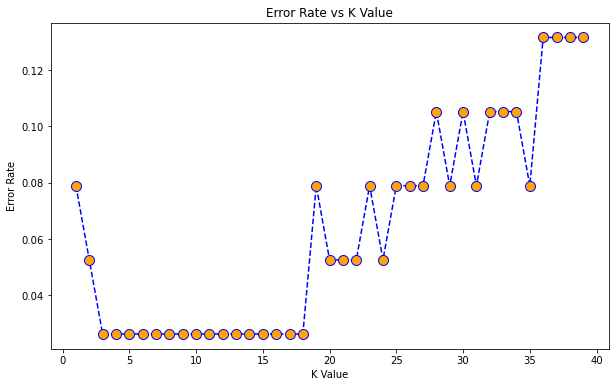

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate1, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'orange', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [13]:
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=2)

In [14]:
from sklearn.metrics import accuracy_score
#The accuracu score is
print(accuracy_score(y_test,y_hat_test))

0.9736842105263158


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
# Compare our trained data with the original test data
print('For our model with K = 5')
print('\n')
print(confusion_matrix(y_test,y_hat_test))
print('\n')
print(classification_report(y_test,y_hat_test))

For our model with K = 5


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



**By using Elbow method we find the best K value for the built in function**

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
error_rate2 = []
for i in range(1,40):
    #same as above methods
    knn = KNeighborsClassifier(n_neighbors=i, p = 2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

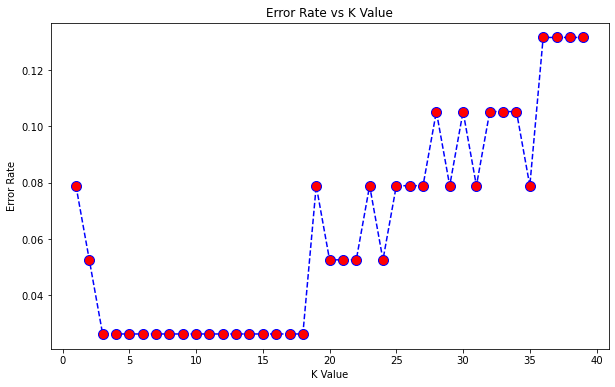

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate2, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [18]:
knn  = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train,y_train)
# Compare our trained data with the original test data
y_pred_test = knn.predict(X_test)

from sklearn.metrics import accuracy_score
# The accuracy is 97%
print(accuracy_score(y_test,y_pred_test))

0.9736842105263158


In [19]:
print('For SKlearn KNN with K= 5')
print('\n')
print(confusion_matrix(y_test,y_pred_test))
print('\n')
print(classification_report(y_test,y_pred_test))

For SKlearn KNN with K= 5


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

